In [1]:
import pandas as pd 

uselog = pd.read_csv('use_log.csv')
customer = pd.read_csv('customer_master.csv')
class_master = pd.read_csv('class_master.csv')
campaign_master = pd.read_csv('campaign_master.csv')

In [2]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


## 데이터 전처리

In [4]:
customer_join = pd.merge(customer, class_master, on = 'class', how = 'left')
customer_join = pd.merge(customer_join, campaign_master, on = 'campaign_id', how = 'left')
customer_join.head() # 31

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [5]:
print(len(customer))
print(len(customer_join))

4192
4192


In [6]:
# null check
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [7]:
# 클래스 별 등록 횟수
class_register_count = customer_join.groupby('class_name', as_index = False).agg(count = ('customer_id', 'count'))

import plotly.express as px

fig = px.pie(class_register_count, values='count', names='class_name')
fig.show()

In [8]:
# 캠페인 별 등록 횟수
campaign_register_count = customer_join.groupby('campaign_name', as_index = False).agg(count = ('customer_id', 'count'))

fig = px.pie(campaign_register_count, values='count', names='campaign_name')
fig.show()

In [9]:
# 성별 등록 횟수
gender_register_count = customer_join.groupby('gender',as_index = False).agg(count = ('customer_id', 'count'))

fig = px.bar(gender_register_count, x='gender', y='count')
fig.show()

In [10]:
# 현재 다니고 있는 사람과, 다지니 않는 사람의 수
is_deleted_customer = customer_join.groupby('is_deleted', as_index = False).agg(count = ('customer_id', 'count'))
is_deleted_customer.loc[0,'is_deleted'] = '탈퇴'
is_deleted_customer.loc[1,'is_deleted'] = '지속'
fig = px.pie(is_deleted_customer, values='count', names='is_deleted')
fig.show()

In [11]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [12]:
# 유저별 이용 이력을 집계
uselog['usedate'] = pd.to_datetime(uselog['usedate']) # data type을 object -> datetime
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['연월','customer_id'], as_index = False).agg(count = ('log_id', 'count'))
# 그룹화할데이터.groupby(그룹화할 칼럼).agg(그룹화 된 칼럼 이름 = (그룹화 할 때 계산할 칼럼, 연산 방법))
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [ ]:
uselog_months.to_csv("use_log_months.csv",index=False)

In [13]:
# 고객들이 (최대, 최소, 평균, 중앙값)으로 온 횟수를 계산합니다.
uselog_customer = uselog_months.groupby('customer_id', as_index = False).agg(
    max = ('count', 'max'),
    min = ('count', 'min'),
    median = ('count', 'median'),
    mean = ('count', 'mean'))
uselog_customer.head()

,customer_id,max,min,median,mean
0,AS002855,7,2,5.0,4.500000
1,AS008805,8,1,4.0,4.000000
2,AS009013,2,2,2.0,2.000000
3,AS009373,7,3,5.0,5.083333
4,AS015233,11,4,7.0,7.545455


In [14]:
uselog.head()

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [15]:
# 유저들이 정기적으로 왔는가?
uselog['weekday'] = uselog['usedate'].dt.weekday # 무슨 요일에 왔는지 새로운 칼럼으로 추가합니다.
userlog_weekday = uselog.groupby(['customer_id','연월','weekday'], as_index = False).agg(count = ('log_id', 'count'))
userlog_weekday = userlog_weekday.groupby('customer_id', as_index = False).max() # 유저가 온달의 최대값을 기준으로 합니다.
userlog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201903,6,5
1,AS008805,201903,6,4
2,AS009013,201804,0,2
3,AS009373,201903,6,5
4,AS015233,201903,6,5


In [16]:
import numpy as np

userlog_weekday = userlog_weekday.assign(routine_flg = np.where(userlog_weekday['count'] < 4, 0, 1))

In [17]:
merge1 = pd.merge(customer_join, uselog_customer, on = 'customer_id', how = 'left')
merge2 = pd.merge(merge1, userlog_weekday[['customer_id','routine_flg']], on = 'customer_id', how = 'left')
customer_join = merge2.drop_duplicates()

In [18]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
max                 0
min                 0
median              0
mean                0
routine_flg         0
dtype: int64

In [19]:
customer_join.tail()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,max,min,median,mean,routine_flg
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,8,8,8.0,8.0,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,10,10,10.0,10.0,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반,8,8,8.0,8.0,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,11,11,11.0,11.0,0
4191,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,0,1_주간,7500,2_일반,10,10,10.0,10.0,0


In [20]:
from dateutil.relativedelta import relativedelta

customer_join.loc[:,'start_date'] = pd.to_datetime(customer_join.loc[:,'start_date']) # 이용개월수를 확인하기 위한 start_date의 data type을 수정합니다.
customer_join.loc[:,'calc_date'] = customer_join.loc[:,'end_date']
customer_join.loc[:,'calc_date'] = customer_join.loc[:,'calc_date'].fillna(pd.to_datetime('20190430')) # 현재 다니고 있는 사람의 이용 개월 수를 계산하기 위해서 20190430를 datetime으로 넣어줍니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})



In [21]:
customer_join = customer_join.reset_index(drop=True)
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
  delta = relativedelta(customer_join.loc[i,'calc_date'] ,customer_join.loc[i,'start_date'])
  membership_period = delta.years * 12 + delta.months
  customer_join.loc[i,'membership_period'] = membership_period

In [22]:
customer_join[['mean','median','max','min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [23]:
customer_join.groupby('routine_flg').agg(count = ('customer_id', 'count'))

,count
routine_flg,
0,779
1,3413


In [24]:
len(list(set(customer_join['customer_id'].unique())))

4192

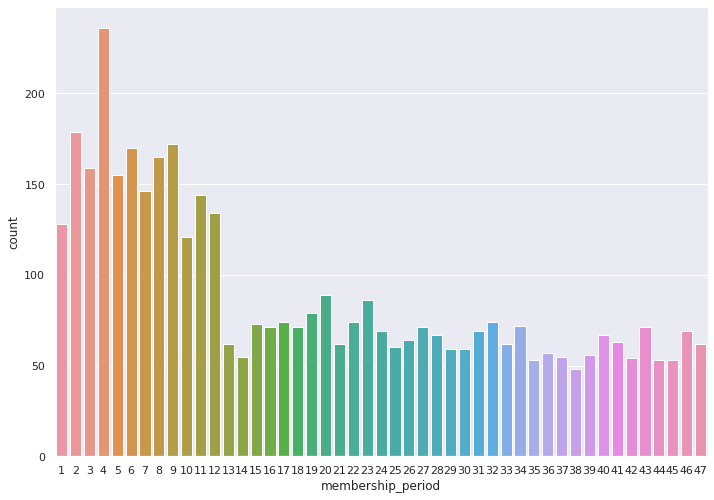

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Plot the responses for different events and regions
sns.countplot(x="membership_period",data=customer_join)

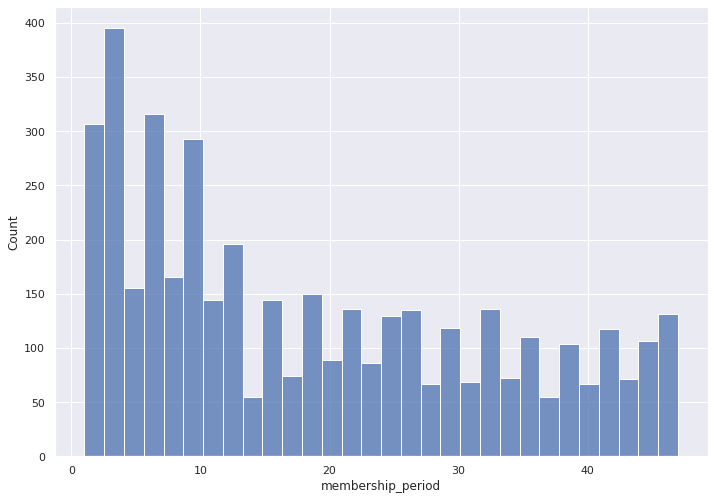

In [26]:
sns.histplot(data=customer_join, x="membership_period", bins=30)

In [27]:
# 전체 유저 다닌 개월 수의 평균
customer_join['membership_period'].mean()

18.83587786259542

In [28]:
class_name_period = customer_join.groupby(['class_name'], as_index = False).agg(mean_period = ('membership_period','mean'))

fig = px.bar(class_name_period, x='class_name', y='mean_period', color = 'class_name')
fig.show()

In [29]:
gender_mean_period = customer_join.groupby(['gender'], as_index = False).agg(mean_period = ('membership_period','mean'))
fig = px.bar(gender_mean_period, x='gender', y='mean_period', color = 'gender')
fig.show()

In [30]:
campaign_mean_period = customer_join.groupby(['campaign_name'], as_index = False).agg(mean_period = ('membership_period','mean'))
fig = px.bar(campaign_mean_period, x='campaign_name', y='mean_period', color = 'campaign_name')
fig.show()

In [32]:
fig = px.box(customer_join, y="max")
fig.show()

In [33]:
customer_stay = customer_join[customer_join['is_deleted'] == 0]
customer_end = customer_join[customer_join['is_deleted'] == 1]

In [34]:
customer_end.to_csv('customer_end.csv')
customer_stay.to_csv('customer_stay.csv')

In [35]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,max,min,median,mean,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,8,2,5.0,4.833333,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,7,3,5.0,5.083333,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,6,3,5.0,4.583333,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,7,2,4.5,4.833333,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,6,1,4.0,3.916667,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8,8,8.0,8.000000,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10,10,10.0,10.000000,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8,8,8.0,8.000000,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11,11,11.0,11.000000,0,2019-04-30,1


In [36]:
customer_join['start_date_month'] = customer_join['start_date'].dt.strftime('%Y%m')
start_users = customer_join.groupby('start_date_month', as_index = False).agg(count = ('customer_id', 'count'))

fig = px.line(start_users, x="start_date_month", y="count", title='일별 등록자 수')
fig.show()

In [37]:
customer_join.to_csv("customer_join.csv", index = False)

### Chapter2

In [50]:
class_campaign_count = customer_join.groupby(["class_name",'campaign_name'], as_index = False).agg(count = ('customer_id', 'count'))


In [51]:
import plotly.express as px
fig = px.histogram(class_campaign_count, x="class_name", y="count",
             color='campaign_name', barmode='group',
             height=400)
fig.show()

# 10시 50분까지 자유롭게 시각화 하거나, 아래의 내용을 시각화 해주세요.

In [52]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,max,min,median,mean,routine_flg,calc_date,membership_period,start_date_month
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,8,2,5.0,4.833333,1,2019-04-30,47,201505
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,7,3,5.0,5.083333,1,2019-04-30,47,201505
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,6,3,5.0,4.583333,1,2019-04-30,47,201505
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,7,2,4.5,4.833333,1,2019-04-30,47,201505
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,6,1,4.0,3.916667,1,2019-04-30,47,201505


### 성별에 따른 class 선호도 차이

In [54]:
class_gender_count = customer_join.groupby(["class_name",'gender'], as_index = False).agg(count = ('customer_id', 'count'))
fig = px.histogram(class_gender_count, x="class_name", y="count",
             color='gender', barmode='group',
             height=400)
fig.show()

### 성별에 따른 켐페인과 campaign 선호도 차이

In [55]:
campaign_gender_count = customer_join.groupby(["campaign_name",'gender'], as_index = False).agg(count = ('customer_id', 'count'))
fig = px.histogram(campaign_gender_count, x="campaign_name", y="count",
             color='gender', barmode='group',
             height=400)
fig.show()

### 장기간 이용한 사람(VIP) 유저의 특징
1. VIP 유저의 기준을 선정
  - 우리만의 기준을 세울 수 있다.
2. 클러스터링(군집화)
  - 우리가 별도로 그룹화하지 않아도 괜찮다.

In [59]:
fig = px.violin(customer_join, y="membership_period")
fig.show()

#### (1) VIP 유저의 기준을 선정

In [67]:
vip_customer = customer_join.query('membership_period >= 40')
vip_customer.groupby('campaign_name').agg(count = ('customer_id', 'count'))

# 어떤 성별이 많은지? -> 차이가 없다.
# 어떤 클레스가 많은지? -> 차이가 없다.
# 어떤 켐페인이 많은지? -> 혜택을 받고 사용하고 있는 VIP 유저가 없다.

,count
campaign_name,
2_일반,492


#### (2) 클러스터링(군집화)

In [71]:
customer_clustering = customer_join.loc[:,'max':'membership_period'].drop(['routine_flg','calc_date'],axis = 1)
customer_clustering.head()

,max,min,median,mean,membership_period
0,8,2,5.0,4.833333,47
1,7,3,5.0,5.083333,47
2,6,3,5.0,4.583333,47
3,7,2,4.5,4.833333,47
4,6,1,4.0,3.916667,47


In [72]:
# 스케일 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(customer_clustering)
customer_clustering_sc = scaler.transform(customer_clustering)

In [74]:
# 군집화
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=4, random_state = 0)
kmc.fit(customer_clustering_sc)
label_kmc = kmc.labels_
label_kmc

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [76]:
customer_clustering['cluster'] = label_kmc

In [78]:
# 클러스터의 개수 확인
customer_clustering.groupby('cluster').agg(count = ('median', 'count'))

,count
cluster,
0,1255
1,856
2,1093
3,988


In [81]:
customer_clustering.groupby('cluster').mean()

,max,min,median,mean,membership_period
cluster,,,,,
0,6.244622,1.720319,3.468924,3.711459,8.079681
1,9.974299,6.099299,7.960280,8.000136,6.300234
2,7.183898,2.106130,4.618024,4.627325,38.343092
3,8.675101,3.104251,5.865891,5.863162,21.779352


- 클러스터 2번 같은 경우는 이용기간이 길고, 평균적으로 4~5회 왔으며 한달에 최대 7번 까지 방문했다.(꾸준히 오는 VIP)
- 클러스터 1번 같은 경우는 이용기간이 짧고, 평균적으로 8회 방문했으며, 많이 올 때는 9번 방문했다. (짧은 기간 열심히)
- 클러스터 0번 같은 경우는 1번에 비해 이용기간은 길지만, 방문횟수는 적다. (열정적 X)
- 클러스터 3번 클러스터 2번에 비해 이용기간은 짧지만, 방문 빈도는 횟수는 많다.

## 3시 40분까지 아래의 내용을 수행 후 업로드해주세요.
- 시각화자료를 해석하여 ppt 자료에 넣기
- 새롭게 시각화 할 내용을 생각해보기
  - 스스로 시각화가 가능하면 시각화
  - 아니면 강사에게 아이디어만 공유

* 꼭 40분이 아니라 중간에 ppt 피드백을 받고 진행하셔도 괜찮습니다.
메세지로 ppt파일을 보내주시면 확인 후 피드백하겠습니다.